# Roadmap

In [ ]:
# First I will use sales-only data to forecast demand. I will train with the training set,
# then predict and score using the test set.
# Then I will add in promotional info and do regression with ARIMA and neural networks

1. Get data
2. Create train-test split
3. Clean training set (write functions): missing values, text, categorical attributes, scaling
4. Select models and scoring metrics, then train
5. Compare them: clean test set, make predictions, score
6. Fine-tune models

## 1. Load data

In [188]:
# imports
import pandas as pd

In [204]:
sales = pd.read_excel('data/wusthof_time_series.xlsx', index_col='EntDate')
sales.head()

012  017  03008944ST-1  03008944ST-3  0300ST1550-1  0300ST15X9-1  \
EntDate                                                                        
2012-04-08    0    0             0             0             0             0   
2012-04-15    0    0             0             0             0             0   
2012-04-22    0    0             0             0             0             0   
2012-04-29    0    0             0             0             0             0   
2012-05-06    0    0             0             0             0             0   

            0300ST15X9-2  0300ST15X9-3  0300ST1605-1  0300ST1605-2   ...     \
EntDate                                                              ...      
2012-04-08             0             0             0             0   ...      
2012-04-15             0             0             0             0   ...      
2012-04-22             0             0             0             0   ...      
2012-04-29             0             0             0             0   ...      
2012-05-06             0             0             0             0   ...      

            9920-2  9920-3  9920-4  9920-5  9920-6  9920-7  9997-25  HW220D15  \
EntDate                                                                         
2012-04-08       0       0       0       0       0       0        0         0   
2012-04-15      20      19       7     166      98       0        0         0   
2012-04-22      41      15      10     207      87       0        0         0   
2012-04-29      38      44      13     101      21      10        0         0   
2012-05-06      29      47      21      75      43       0        0         0   

            HW240DIA  TRUHONE  
EntDate                        
2012-04-08         0        0  
2012-04-15         0        0  
2012-04-22         0        0  
2012-04-29         0        0  
2012-05-06         0        0  

[5 rows x 1833 columns]

## 2. Train-Test Split

In [190]:
import matplotlib.pyplot as plt
# splitting into training and testing sets using 66-34
X = sales.values
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 292
Training Observations: 192
Testing Observations: 100


In [191]:
# made train_df and test_df (the latter to be used later)
train_df = sales[0:192]
test_df = sales[192:292]
train_df.head()

012  017  03008944ST-1  03008944ST-3  0300ST1550-1  0300ST15X9-1  \
EntDate                                                                        
2012-04-08    0    0             0             0             0             0   
2012-04-15    0    0             0             0             0             0   
2012-04-22    0    0             0             0             0             0   
2012-04-29    0    0             0             0             0             0   
2012-05-06    0    0             0             0             0             0   

            0300ST15X9-2  0300ST15X9-3  0300ST1605-1  0300ST1605-2   ...     \
EntDate                                                              ...      
2012-04-08             0             0             0             0   ...      
2012-04-15             0             0             0             0   ...      
2012-04-22             0             0             0             0   ...      
2012-04-29             0             0             0             0   ...      
2012-05-06             0             0             0             0   ...      

            9920-2  9920-3  9920-4  9920-5  9920-6  9920-7  9997-25  HW220D15  \
EntDate                                                                         
2012-04-08       0       0       0       0       0       0        0         0   
2012-04-15      20      19       7     166      98       0        0         0   
2012-04-22      41      15      10     207      87       0        0         0   
2012-04-29      38      44      13     101      21      10        0         0   
2012-05-06      29      47      21      75      43       0        0         0   

            HW240DIA  TRUHONE  
EntDate                        
2012-04-08         0        0  
2012-04-15         0        0  
2012-04-22         0        0  
2012-04-29         0        0  
2012-05-06         0        0  

[5 rows x 1833 columns]

## Select single item for forecasting

In [48]:
test = train_df['9920-2']
test.head()

EntDate
2012-04-08     0
2012-04-15    20
2012-04-22    41
2012-04-29    38
2012-05-06    29
Name: 9920-2, dtype: int64

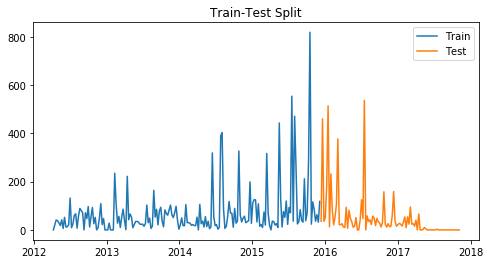

In [210]:
# then plotting it using different colors
plt.figure(figsize=(8,4))
plt.plot(train_df.index, train_df['9920-2'], label='Train')
plt.plot(test_df.index,test_df['9920-2'], label='Test')
plt.legend(loc='best')
plt.title("Train-Test Split")
plt.show()

## 3. Clean Training Set

In [179]:
# make a copy first

In [ ]:
# make transformations pipeline (first applied to train, then apply to test)
# luckily, our data has no null values, no categorical/text values
# however, to get the initial messy excel sheet into timeseries format was not easy
# describe

## 4. Select Models and Scoring Metrics

We are comparing different forecasting models on the same data, so we can use scale-dependent errors because our single dataset only has one scale. We will use two metrics: <br>
* MAD (also called MAE): $\frac{|A_t-F_t|}{n}$ <br>
* RMSE (root mean squared error): $\sqrt{\frac{(A_t-F_t)^2}{n}}$ <br>

For baseline, we will use:
* naive forecast ("only yesterday matters")

Then we will try two simple forecasts:
* cumulative ("history matters")
* moving average ("I select how much matters")

We will also try:
* ARIMA
* exponential smoothing

In [ ]:
# to select proper exponential smoothing method, we must decompose the time series first

### Naive Forecast (Baseline)

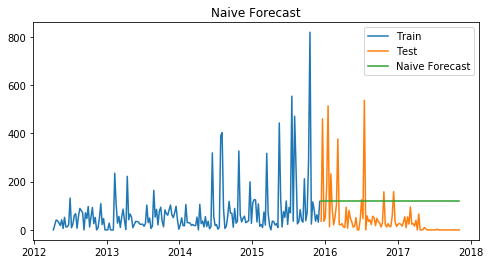

In [209]:
import numpy as np

dd= np.asarray(train_df['9920-2'])
y_hat = test_df.copy()
y_hat['naive'] = dd[len(dd)-1] # this line of code is for one-time forecast
plt.figure(figsize=(8,4))
plt.plot(train_df.index, train_df['9920-2'], label='Train')
plt.plot(test_df.index,test_df['9920-2'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [51]:
# calculate RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test_df['9920-2'], y_hat.naive))
print(rms)

118.89861227112787


In [52]:
# calculate MAE
from sklearn.metrics import mean_absolute_error
mad = mean_absolute_error(test_df['9920-2'], y_hat.naive)
print(mad)

103.2


### Cumulative

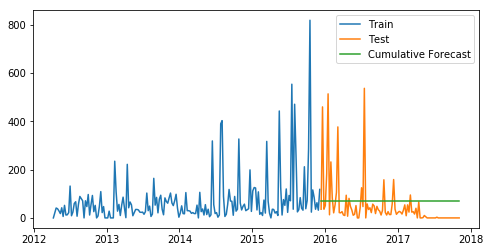

In [205]:
y_hat['cumulative'] = train_df['9920-2'].mean()
plt.figure(figsize=(8,4))
plt.plot(train_df['9920-2'], label='Train')
plt.plot(test_df['9920-2'], label='Test')
plt.plot(y_hat['cumulative'], label='Cumulative Forecast')
plt.legend(loc='best')
plt.show()

In [54]:
# calculate RMSE
rms = sqrt(mean_squared_error(test_df['9920-2'], y_hat.cumulative))
print(rms)

98.71710073012933


In [55]:
# calculate MAE
from sklearn.metrics import mean_absolute_error
mad = mean_absolute_error(test_df['9920-2'], y_hat.cumulative)
print(mad)

65.6625


### Moving Average

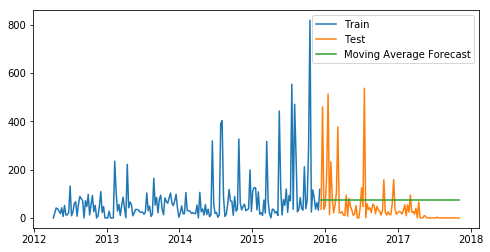

In [206]:
# since forecasts are for an entire year, we are using 52 weeks
y_hat['moving_avg'] = train_df['9920-2'].rolling(156).mean().iloc[-1]
plt.figure(figsize=(8,4))
plt.plot(train_df['9920-2'], label='Train')
plt.plot(test_df['9920-2'], label='Test')
plt.plot(y_hat['moving_avg'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [77]:
# calculate RMSE
rms = sqrt(mean_squared_error(test_df['9920-2'], y_hat.moving_avg))
print(rms)

100.23578524978832


In [28]:
# calculate MAE
from sklearn.metrics import mean_absolute_error
mad = mean_absolute_error(test_df['9920-2'], y_hat.moving_avg)
print(mad)

99.62218337218337


### S/ARIMA

In [177]:
from pyramid.arima import ARIMA

fit = ARIMA(order=(1, 2, 0), seasonal_order=(1, 0, 0, 12)).fit(y=train_df['9920-2'])

# fitting a stepwise model:
from pyramid.arima import auto_arima

stepwise_fit = auto_arima(train_df['9920-2'], start_p=0, start_q=0, max_p=6, max_q=6, m=12,
                          start_P=0, seasonal=True, d=1, D=1, trace=True,
                          error_action='ignore',  # don't want to know if an order does not work
                          suppress_warnings=True,  # don't want convergence warnings
                          stepwise=True)  # set to stepwise

stepwise_fit.summary()

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=2299.798, BIC=2309.360, Fit time=0.147 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=2393.089, BIC=2399.464, Fit time=0.016 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=2296.914, BIC=2309.663, Fit time=0.280 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=2198.257, BIC=2211.007, Fit time=0.246 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=2199.688, BIC=2215.625, Fit time=0.444 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=2254.537, BIC=2264.099, Fit time=0.072 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=2202.202, BIC=2221.326, Fit time=1.720 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=2199.509, BIC=2215.446, Fit time=0.392 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_orde

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  192
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1095.129
Date:                            Tue, 29 May 2018   AIC                           2198.257
Time:                                    16:53:13   BIC                           2211.007
Sample:                                         0   HQIC                          2203.427
                                            - 192                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1114      0.093      1.193      0.233      -0.072       0.294
ma.L1         -0.9998      2.187     -0.457      0.648      -5.286       3.287
ma.S.L12      -0.8618      0.100     -8.630      0.000      -1.057      -0.666
sigma2      1.057e+04    2.3e+04      0.460      0.645   -3.44e+04    5.56e+04
===================================================================================
Ljung-Box (Q):                       54.84   Jarque-Bera (JB):              2559.44
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               8.36   Skew:                             3.56
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [181]:
test_df.tail()

012  017  03008944ST-1  03008944ST-3  0300ST1550-1  0300ST15X9-1  \
EntDate                                                                        
2017-10-08    0    0             0             0             0             0   
2017-10-15    0    0             0             0             0             0   
2017-10-22    0    0             0             0             0             0   
2017-10-29    0    0             0             0             0             0   
2017-11-05    0    0             0             0             0             0   

            0300ST15X9-2  0300ST15X9-3  0300ST1605-1  0300ST1605-2   ...     \
EntDate                                                              ...      
2017-10-08             0             0             0             0   ...      
2017-10-15             0             0             0             0   ...      
2017-10-22             0             0             0             0   ...      
2017-10-29             0             0             0             0   ...      
2017-11-05             0             0             0             0   ...      

            9920-2  9920-3  9920-4  9920-5  9920-6  9920-7  9997-25  HW220D15  \
EntDate                                                                         
2017-10-08       0       3       0       0       0      13        0         0   
2017-10-15       0       0       0       0       0       0        0         0   
2017-10-22       0       0       0       0       0       0        0         0   
2017-10-29       0       0       0       0       0       0        2         0   
2017-11-05       0       0       0       0       0       0        0         0   

            HW240DIA  TRUHONE  
EntDate                        
2017-10-08         0        0  
2017-10-15         0        0  
2017-10-22         0        0  
2017-10-29         0        0  
2017-11-05         0        0  

[5 rows x 1833 columns]

/Users/andreafabry/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


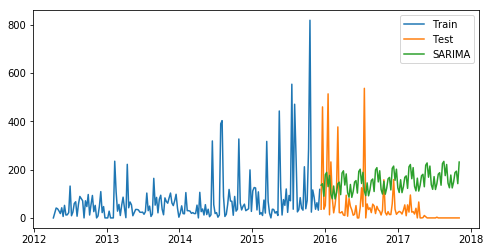

In [182]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

fit1 = SARIMAX(train_df['9920-2'], order=(0, 1, 1), seasonal_order=(0,1,1,12)).fit()
y_hat['SARIMA'] = fit1.predict(start="2015-12-13", end="2017-11-05", dynamic=True, typ='levels')
plt.figure(figsize=(8,4))
plt.plot(train_df['9920-2'], label='Train')
plt.plot(test_df['9920-2'], label='Test')
plt.plot(y_hat['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [185]:
rms = sqrt(mean_squared_error(test_df['9920-2'], y_hat.SARIMA))
print(rms)

150.9936530434742


### Exponential Smoothing

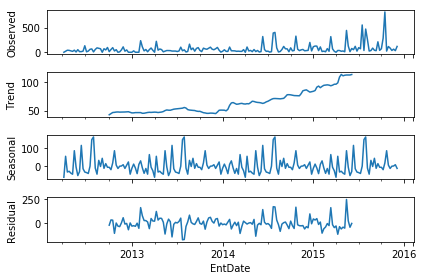

In [33]:
# let's decompose it first to see trend, seasonality
from statsmodels.tsa.seasonal import seasonal_decompose
series = train_df['9920-2']
result_a = seasonal_decompose(series, model='additive')
result_a.plot()
plt.show()

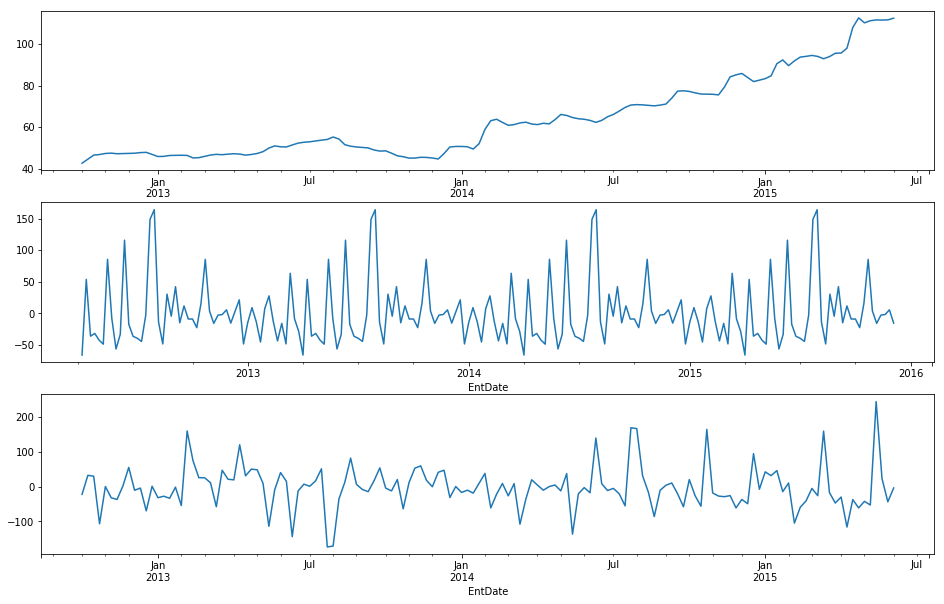

In [34]:
# let's plot it a bit bigger
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(16,10))
result_a.trend.plot(ax=ax1, label='Trend')
result_a.seasonal.plot(ax=ax2)
result_a.resid.plot(ax=ax3)
plt.show()

In [ ]:
# -- unable to correct for 0 values
from statsmodels.tsa.api import Holt

y_hat_avg = test_df.copy()
fit1 = Holt(np.asarray(train_df['9920-2']), exponential=True).fit(smoothing_level=0.3, smoothing_slope=0.69)
y_hat_avg['Holt'] = fit1.forecast(len(test_df))
plt.figure(figsize=(8,4))
plt.plot( train_df['9920-2'], label='Train')
plt.plot(test_df['9920-2'], label='Test')
plt.plot(y_hat_avg['Holt'], label='Holt')
plt.legend(loc='best')
plt.show()

In [ ]:
# Holt -- unable to correct for 0 values
from statsmodels.tsa.api import Holt

fit1 = Holt(np.asarray(train_df['9920-2']), exponential=True, damped=True).fit(smoothing_level=0.3, smoothing_slope=0.7, damping_slope=0.15)
y_hat_avg['Holt_damped'] = fit1.forecast(len(test_df))
plt.figure(figsize=(8,4))
plt.plot( train_df['9920-2'], label='Train')
plt.plot(test_df['9920-2'], label='Test')
plt.plot(y_hat_avg['Holt_damped'], label='Holt_damped')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test_df.num_births, y_hat_avg.Holt_damped))
print(rms)

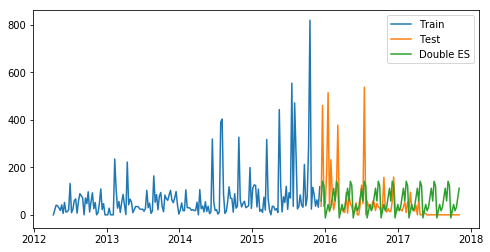

In [195]:
# no trend, just seasonality (multiplicative), no damping
from statsmodels.tsa.api import ExponentialSmoothing

fit1 = ExponentialSmoothing(np.asarray(train_df['9920-2']), seasonal_periods=10, trend=None, seasonal='additive').fit(smoothing_level=0.51, smoothing_seasonal=0.1)
y_hat['DES'] = fit1.forecast(len(test_df))
plt.figure(figsize=(8,4))
plt.plot( train_df['9920-2'], label='Train')
plt.plot(test_df['9920-2'], label='Test')
plt.plot(y_hat['DES'], label='Double ES')
plt.legend(loc='best')
plt.show()

In [196]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test_df['9920-2'], y_hat.DES))
print(rms)

99.37421663636931


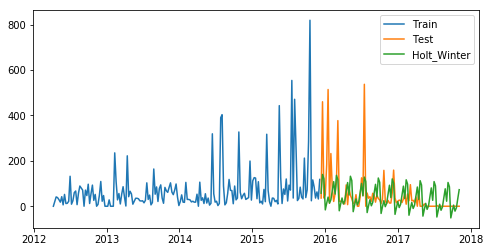

In [207]:
# here we have trend and seasonality, so we will use Holt-Winters
from statsmodels.tsa.api import ExponentialSmoothing

fit1 = ExponentialSmoothing(np.asarray(train_df['9920-2']), seasonal_periods=10, trend='add', seasonal='add').fit(smoothing_level=0.51, smoothing_slope=0.015,smoothing_seasonal=0.1)
y_hat['Holt_Winter'] = fit1.forecast(len(test_df))
plt.figure(figsize=(8,4))
plt.plot( train_df['9920-2'], label='Train')
plt.plot(test_df['9920-2'], label='Test')
plt.plot(y_hat['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [198]:
# calculate RMSE
rms = sqrt(mean_squared_error(test_df['9920-2'], y_hat.Holt_Winter))
print(rms)

95.08487981400313


In [116]:
# calculate MAE
from sklearn.metrics import mean_absolute_error
mad = mean_absolute_error(test_df['9920-2'], y_hat.Holt_Winter)
print(mad)

57.5717854748489


### Prophet

In [159]:
# imports 
from fbprophet import Prophet

In [160]:
# prophet requires the variable names in the time series to be
# y for target and ds for Datetime
training = pd.DataFrame(train_df['9920-2'].copy())
training['ds'] = training.index
training['y'] = training['9920-2']
training.drop(['9920-2'],axis = 1, inplace = True)

In [161]:
training.head()

ds   y
EntDate                  
2012-04-08 2012-04-08   0
2012-04-15 2012-04-15  20
2012-04-22 2012-04-22  41
2012-04-29 2012-04-29  38
2012-05-06 2012-05-06  29

In [199]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95, weekly_seasonality=True)
my_model.fit(training)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/andreafabry/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [200]:
future_dates = my_model.make_future_dataframe(periods=100, freq='W')
future_dates.head()
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
287 2017-10-08  212.203626   47.664739  392.484604
288 2017-10-15  259.776269   82.720730  429.408965
289 2017-10-22  255.874577   85.463743  436.686906
290 2017-10-29  205.772771   23.637496  382.901105
291 2017-11-05  152.861748  -18.348467  344.755371

In [201]:
forecast.head()
forecast = forecast.set_index('ds')
forecast_slice=forecast[192:292]
forecast_df = forecast_slice["yhat"]
forecast_df.head()

ds
2015-12-13    107.174022
2015-12-20    111.567014
2015-12-27    112.039484
2016-01-03    101.748567
2016-01-10     88.797489
Name: yhat, dtype: float64

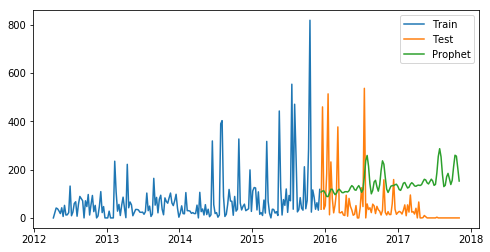

In [208]:
plt.figure(figsize=(8,4))
plt.plot(train_df['9920-2'], label='Train')
plt.plot(test_df['9920-2'], label='Test')
plt.plot(forecast_slice['yhat'], label='Prophet')
plt.legend(loc='best')
plt.show()

In [203]:
rms = sqrt(mean_squared_error(test_df['9920-2'], forecast_slice['yhat']))
print(rms)

147.99649255573917
